In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_validate
#from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# Processing the data

col_names = ['ID','Name','Sex','Age','Height','Weight','Team','NOC', 'Games','Year','Season','City','Sport','Event','Medal']

df1 = pd.read_csv('athletes_updated.csv', usecols=col_names)

df1['Medal'].fillna(0, inplace=True)
print (df1)


#print (df4)
#print (df4.shape)
df1 = df1.replace({'Medal': {'Gold': 1, 'Silver': 1, 'Bronze': 1}})
#print (df1)
df1 = df1.dropna(axis=0)

            ID                                Name Sex   Age      Height  \
0            1                           A Dijiang   M  24.0  180.000000   
1            2                            A Lamusi   M  23.0  170.000000   
2            3                 Gunnar Nielsen Aaby   M  24.0  179.200997   
3            4                Edgar Lindenau Aabye   M  34.0  179.200997   
4            5            Christine Jacoba Aaftink   F  21.0  185.000000   
5            5            Christine Jacoba Aaftink   F  21.0  185.000000   
6            5            Christine Jacoba Aaftink   F  25.0  185.000000   
7            5            Christine Jacoba Aaftink   F  25.0  185.000000   
8            5            Christine Jacoba Aaftink   F  27.0  185.000000   
9            5            Christine Jacoba Aaftink   F  27.0  185.000000   
10           6                     Per Knut Aaland   M  31.0  188.000000   
11           6                     Per Knut Aaland   M  31.0  188.000000   
12          

In [2]:
#Processing the data continued
df2 = df1[['NOC','Year','Season','Name']]
df3 = df1[['NOC','Year','Season','Event','Medal']]

df2 = df2.drop_duplicates()
df2 = df2.groupby(by=['NOC','Year', 'Season']).agg({'Name':'count'}).reset_index().rename(columns={'Name':'ath_cnt'})

df3 = df3.drop_duplicates()
df3 = df3.groupby(['NOC','Year','Season']).agg({'Medal':'sum'}).reset_index().rename(columns={'Medal':'Med_cnt'})

df3.to_csv(r'C:\Users\Prashamsh\Documents\Data Science Projects\athletes_updated_latxx.csv')
df = pd.concat([df2, df3], axis=1)

df = df.iloc[:, ~df.columns.duplicated()]


df.to_csv(r'C:\Users\Prashamsh\Documents\Data Science Projects\athletes_updated_lat1.csv')


NOC_Map = {}

for i, j in enumerate(np.unique(df['NOC'])):
    NOC_Map[j] = i

In [3]:
# Enumerating NOC column to represent integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['NOC']))}
class_mapping
df['NOC'] = df['NOC'].map(class_mapping)
df



'''class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Year']))}
class_mapping
df['Year'] = df['Year'].map(class_mapping)
df'''

col_names = ['NOC','Year','Season','ath_cnt']

#One hot encoding Season

#print (df)
X = df[col_names].values 
color_le = LabelEncoder() 
X[:, 2] = color_le.fit_transform(X[:, 2])
X
#print (X)
ohe = OneHotEncoder(categorical_features=[2])
ohe.fit_transform(X).toarray()
#df = DataFrame(pd.get_dummies(df[col_names]))
pd.get_dummies(df[col_names])
X = pd.get_dummies(df[col_names]).as_matrix()
y = df['Med_cnt'].values
#X = df[].values 
#print (df)
print (X)
print(X.shape)

[[   0 1936   15    1    0]
 [   0 1948   25    1    0]
 [   0 1956   12    1    0]
 ...
 [ 225 2012    7    1    0]
 [ 225 2014    1    0    1]
 [ 225 2016   30    1    0]]
(3830, 5)


C:\Users\Prashamsh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Prashamsh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Prashamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix wi

In [4]:
#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=50)

In [5]:
#Training feed forward neural networking model
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD
NN_model = Sequential()


# The Input Layer :

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))



# The Hidden Layers :

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(56, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1))



# Compile the network :

NN_model.compile(loss='mean_squared_error', optimizer='adam')

NN_model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 56)                14392     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 57        
Total params: 114,033
Trainable params: 114,033
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Defining parameters to fit the model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=1, mode='auto')

checkpointer = ModelCheckpoint(filepath='best_weights.hdf5',verbose=3, save_best_only=True)

In [8]:
#Fitting the model
NN_model.fit(X_train, y_train, validation_data = (X_test,y_test), callbacks=[monitor, checkpointer], verbose=0, epochs=1000)
NN_model.load_weights('best_weights.hdf5')

Instructions for updating:
Use tf.cast instead.

Epoch 00001: val_loss improved from inf to 43.85563, saving model to best_weights.hdf5

Epoch 00002: val_loss improved from 43.85563 to 36.07840, saving model to best_weights.hdf5

Epoch 00003: val_loss improved from 36.07840 to 28.71803, saving model to best_weights.hdf5

Epoch 00004: val_loss did not improve from 28.71803

Epoch 00005: val_loss did not improve from 28.71803

Epoch 00006: val_loss did not improve from 28.71803

Epoch 00007: val_loss did not improve from 28.71803

Epoch 00008: val_loss did not improve from 28.71803

Epoch 00009: val_loss improved from 28.71803 to 25.89374, saving model to best_weights.hdf5

Epoch 00010: val_loss did not improve from 25.89374

Epoch 00011: val_loss did not improve from 25.89374

Epoch 00012: val_loss did not improve from 25.89374

Epoch 00013: val_loss improved from 25.89374 to 25.67774, saving model to best_weights.hdf5

Epoch 00014: val_loss did not improve from 25.67774

Epoch 00015: v

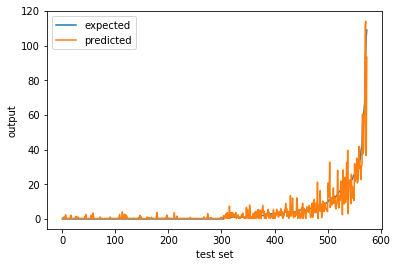

Score (RMSE): 4.7438564153310905


In [8]:
# Plotting predicted vs actual values and calculating RMSE value
from matplotlib.pyplot import figure, show, plot
from matplotlib.pyplot import *
from scipy.stats import zscore
#matplotlib.pyplot.plot(pred.flatten(), y_test)
#matplotlib.pyplot.show()

def chart_regression(pred, y,sort=True):
    t = pd.DataFrame({'pred': pred, 'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    a = plt.plot(t['y'].tolist(), label='expected')
    b = plt.plot(t['pred'].tolist(),label='predicted')
    plt.ylabel('output')
    plt.xlabel('test set')
    plt.legend()
    plt.show()


from sklearn import metrics
pred=NN_model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
chart_regression(pred.flatten(), y_test)
print ("Score (RMSE): {}".format(score))

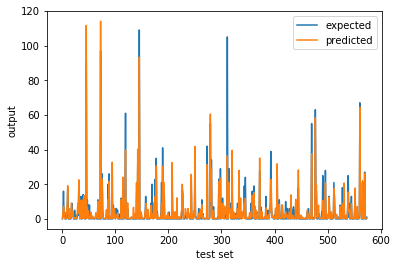

In [9]:
#Plotting regression chart with values not sorted
chart_regression(pred.flatten(), y_test, sort=False)

In [10]:
#Testing on new data
col_names_test = ['NOC','Year','Season','ath_cnt','Season_Summer','Season_Winter']
col_names_test2 = ['NOC','Year','Season','ath_cnt']

df1 = pd.read_csv('athletes_CumMedCnt_test.csv',usecols=col_names_test)

df2 = pd.read_csv('athletes_cnt_test_cnt.csv',usecols=col_names_test2)

count2 = 0
for i in range(len(df1)):
    df1.iloc[i,0] = NOC_Map[df1.iloc[i,0]]
    if df1.iloc[i,2] == 'Winter':
        df1.iloc[i,4] = 0
        df1.iloc[i,5] = 1
    elif df1.iloc[i,2] == 'Summer':
        df1.iloc[i,5] = 0
        df1.iloc[i,4] = 1

        
col_names_test1 = ['NOC','Year','ath_cnt','Season_Summer','Season_Winter']
        
X1 = df1[col_names_test1].values 
pred_test=NN_model.predict(X1)

print (pred_test)

[[31.21328   ]
 [ 5.0905437 ]
 [ 0.24676287]
 [15.439496  ]
 [ 8.360492  ]
 [ 3.8806093 ]
 [ 5.176062  ]
 [19.770145  ]
 [ 9.686595  ]
 [15.248845  ]
 [ 2.693387  ]]


In [12]:
# Testing on new data using Jupyter UI
import ipywidgets as widgets
from IPython.display import display
from sklearn import svm, datasets
from IPython.display import clear_output
import sys
import time


col_names_test = ['NOC','Year','Season','ath_cnt','Season_Summer','Season_Winter']

df1 = pd.read_csv('UIathletes_CumMedCnt_test.csv',usecols=col_names_test)

class learn_classes_and_widgets():
    def __init__(self, param1='', param2='', param3='', param4=''):
        self.p1_text = widgets.Text(description = 'NOC',value = param1)
        self.p2_text = widgets.Text(description = 'Year',value = param2)
        self.p3_text = widgets.Text(description = 'Season',value = param3)
        self.p4_text = widgets.Text(description = 'Ath_Count',value = param4)
        self.p_button = widgets.Button(description="Pred Med Count", value= param1)
        self.p_button.on_click(self.handle_submit)
        display(self.p1_text, self.p2_text, self.p3_text, self.p4_text, self.p_button)
        
    def handle_submit(self, text):
        #clear_output()
        #handle_submit()
        #sys.stdout.write("\033[K") #clear line
        #sys.stdout.write("\033[F") #back to previous line
        
        count = 0
        count1 = 0

        if (self.p1_text.value == '' or self.p2_text.value == '' or self.p3_text.value == '' or self.p4_text.value == '' ):
            print ('One or More inputs missing')
            return 'Please input your values'
        #if not isinstance(self.p2_text.value,int):
        #    print ('Year entered is not an integer')
        #    return 'Please input your values'
        #if not isinstance(self.p4_text.value,int):
        #    print ('Athlete Count entered is not an integer')
        #    return 'Please input your values'
        #print("Submitting")
        #age= int(self.p1_text_value);
        #print(int(self.p1_text.value) + int(self.p2_text.value) + int(self.p3_text.value))
        
        if self.p1_text.value not in NOC_Map.keys():
            print ('Invalid Country Abbrevation')
            return 'Please input your values'    
        
        df1.iloc[0,0] = str(self.p1_text.value)
        df1.iloc[0,1] = int(self.p2_text.value)
        df1.iloc[0,2] = str(self.p3_text.value)
        df1.iloc[0,3] = int(self.p4_text.value)


        for i in range(len(df1)):
            df1.iloc[i,0] = NOC_Map[df1.iloc[i,0]]
            if df1.iloc[i,2] == 'Winter':
                df1.iloc[i,4] = 0
                df1.iloc[i,5] = 1
                count = 1
            elif df1.iloc[i,2] == 'Summer':
                df1.iloc[i,5] = 0
                df1.iloc[i,4] = 1
                count = 1
        

        #print (df1)
        #print (NOC_Map[df1.iloc[0,4]])
           
        if count == 0:
            print ("Invalid Season")
            return 'Please input your values'
       

       
        col_names_test1 = ['NOC','Year','ath_cnt','Season_Summer','Season_Winter']
        
        X1 = df1[col_names_test1].values 
        pred_test=NN_model.predict(X1)

        print ("The predicted medal count is", pred_test)

f = learn_classes_and_widgets(param1 = '')




Text(value='', description='NOC')

Text(value='', description='Year')

Text(value='', description='Season')

Text(value='', description='Ath_Count')

Button(description='Pred Med Count', style=ButtonStyle())